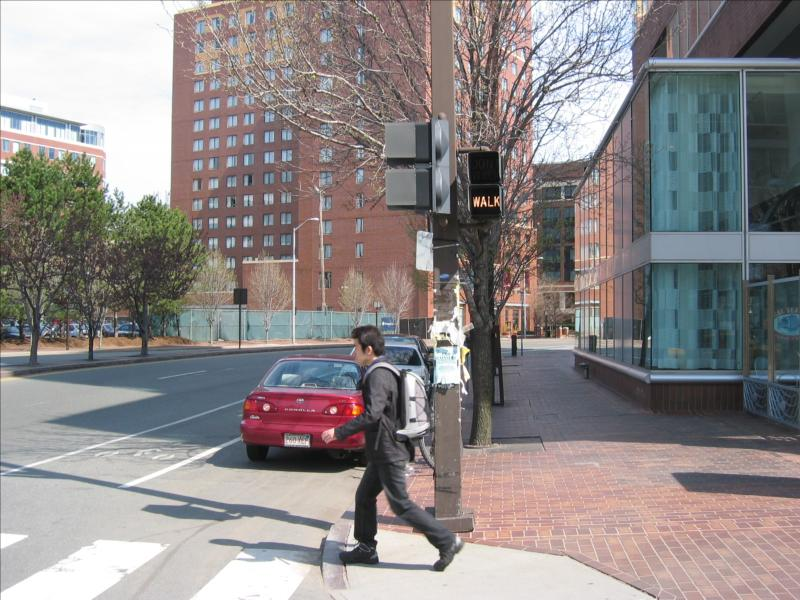

 a man crossing the street.


In [2]:
import requests
import json
import base64
import io
from PIL import Image

image = Image.open('./images/img-2.jpg')
image.show()
image_bytes = io.BytesIO()
image.save(image_bytes, format='JPEG')
base64_image = base64.b64encode(image_bytes.getvalue()).decode('utf-8')

pload = {
        "input_text": "what is in this image?",
        "image": base64_image,
        "image_gen": False
    }


response = requests.post(
            "http://localhost:40000/worker_generate",
            headers={'User-Agent': 'Client'},
            json=pload,
            stream=False,
            timeout=1000
        )

for chunk in response.iter_lines(decode_unicode=False, delimiter=b"\0"):
    if chunk:
        tmp = json.loads(chunk.decode())
        print(tmp["text"])

generate successed.


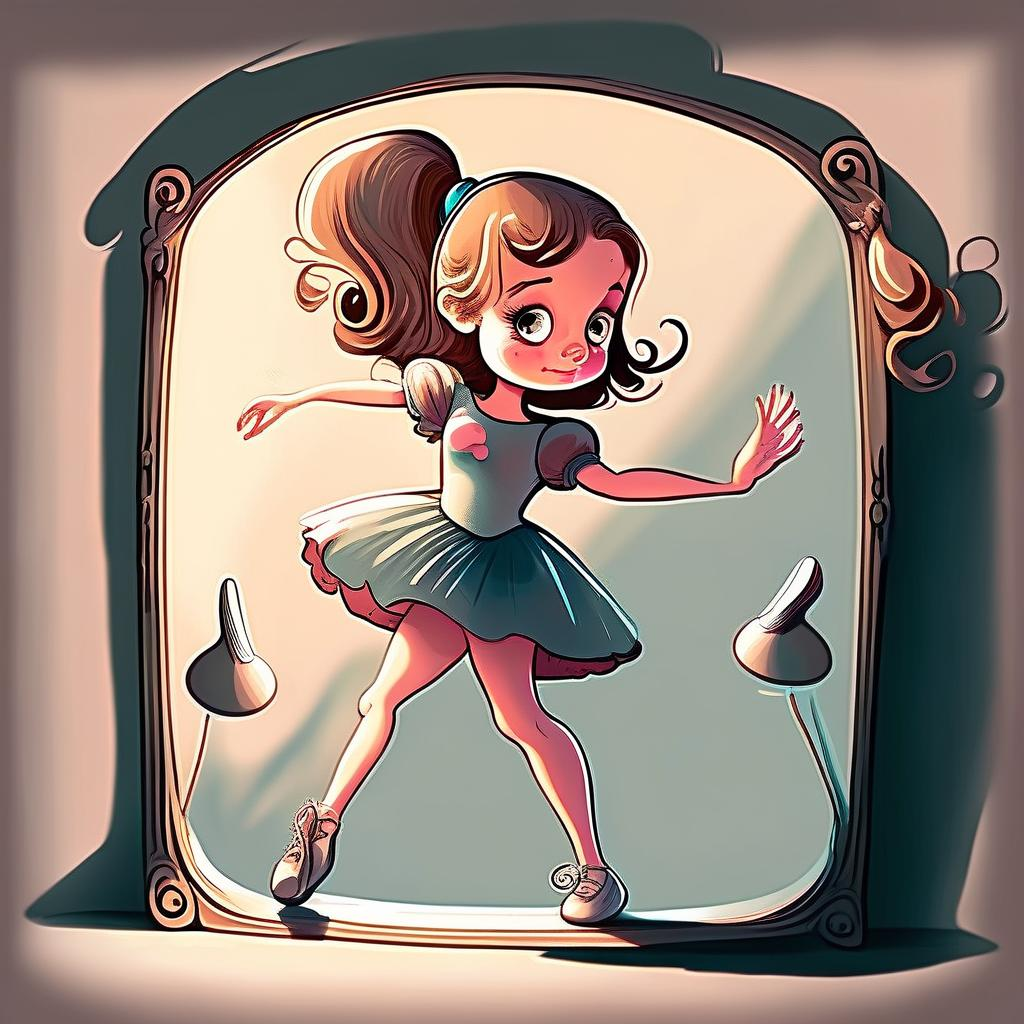

In [3]:
pload = {
        "input_text": "a cartoon girl is dancing besides mirror.",
        "image": "",
        "image_gen": True
    }


response = requests.post(
            "http://localhost:40000/worker_generate",
            headers={'User-Agent': 'Client'},
            json=pload,
            stream=False,
            timeout=1000
        )

for chunk in response.iter_lines(decode_unicode=False, delimiter=b"\0"):
    if chunk:
        tmp = json.loads(chunk.decode())
        print(tmp["text"])

        decoded_data = base64.b64decode(tmp["image"])
        image_data = io.BytesIO(decoded_data)
        image = Image.open(image_data)
        image.show()